In [1]:
# capping with inter-quartile range proximity rule


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# for Q-Q plots
import scipy.stats as stats

from feature_engine.outliers import Winsorizer


In [3]:
data = pd.read_csv('BostonHousing.csv',usecols=['rm','lstat','crim'])
data.head()

,crim,rm,lstat
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


In [4]:
# function to create histogram, Q-Q plot and
# boxplot. We learned this in section 3 of the course


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()


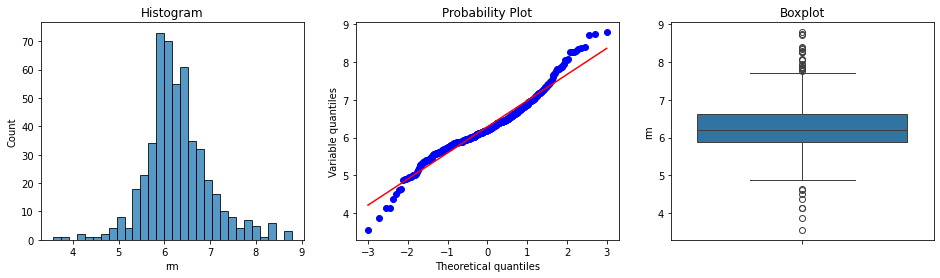

In [6]:
# let's find outliers in RM

diagnostic_plots(data, 'rm')


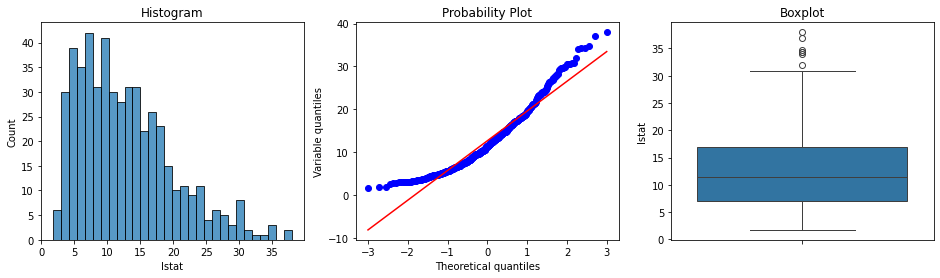

In [7]:
# visualise outliers in LSTAT

diagnostic_plots(data, 'lstat')

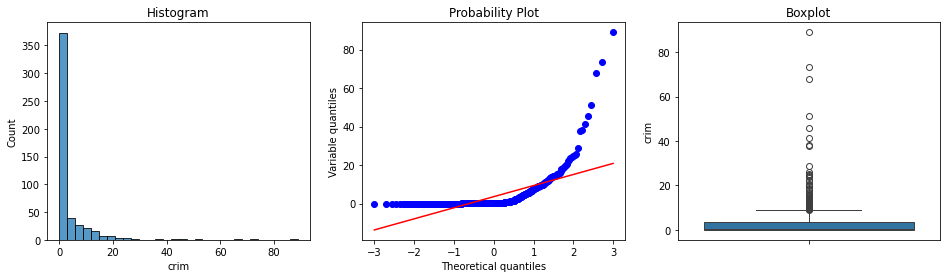

In [8]:
# outliers in CRIM

diagnostic_plots(data, 'crim')


In [9]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [10]:
# find limits for RM

RM_upper_limit, RM_lower_limit = find_skewed_boundaries(data, 'rm', 1.5)
RM_upper_limit, RM_lower_limit


(7.730500000000001, 4.778499999999999)

In [11]:
# limits for LSTAT

LSTAT_upper_limit, LSTAT_lower_limit = find_skewed_boundaries(data, 'lstat', 1.5)
LSTAT_upper_limit, LSTAT_lower_limit



(31.962500000000006, -8.057500000000005)

In [12]:
# limits for CRIM

CRIM_upper_limit, CRIM_lower_limit = find_skewed_boundaries(data, 'crim', 1.5)
CRIM_upper_limit, CRIM_lower_limit

(9.06963875, -5.31051125)

In [13]:
# Now let's replace the outliers by the maximum and minimum limit

data['rm']= np.where(data['rm'] > RM_upper_limit, RM_upper_limit,
                       np.where(data['rm'] < RM_lower_limit, RM_lower_limit, data['rm']))


In [14]:
# Now let's replace the outliers by the maximum and minimum limit

data['lstat']= np.where(data['lstat'] > RM_upper_limit, RM_upper_limit,
                       np.where(data['lstat'] < RM_lower_limit, RM_lower_limit, data['lstat']))


In [15]:
# Now let's replace the outliers by the maximum and minimum limit

data['crim']= np.where(data['crim'] > RM_upper_limit, RM_upper_limit,
                       np.where(data['crim'] < RM_lower_limit, RM_lower_limit, data['crim']))


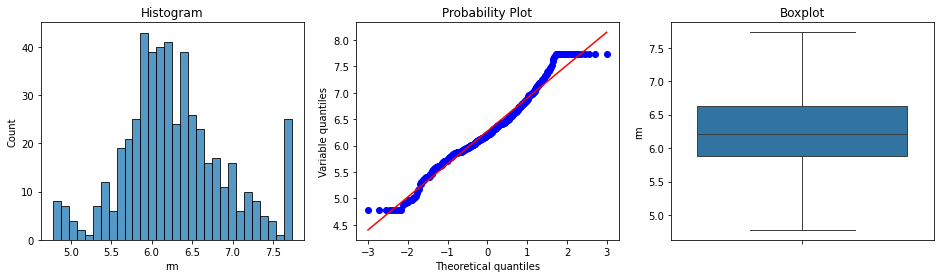

In [16]:
diagnostic_plots(data,'rm')

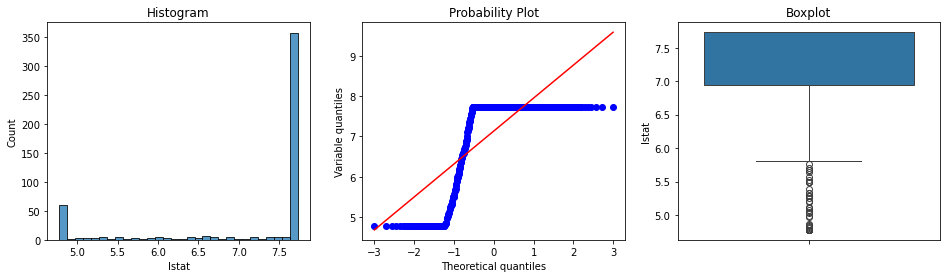

In [17]:
diagnostic_plots(data,'lstat')

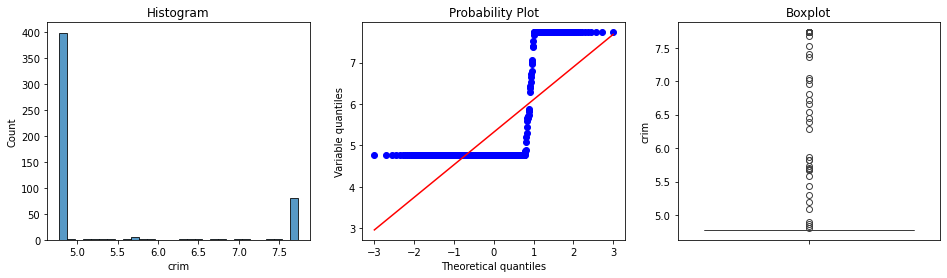

In [18]:
diagnostic_plots(data,'crim')

### Censoring with Feature-engine

In [29]:
data = pd.read_csv('BostonHousing.csv',usecols=['rm','lstat','crim','medv'])
# add the target
#data['medv'] = data['medv'].target
data.head(5)


,crim,rm,lstat,medv
0,0.00632,6.575,4.98,24.0
1,0.02731,6.421,9.14,21.6
2,0.02729,7.185,4.03,34.7
3,0.03237,6.998,2.94,33.4
4,0.06905,7.147,5.33,36.2


In [30]:
# create the capper

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['rm','lstat','crim','medv'])

windsoriser.fit(data)


Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['rm', 'lstat', 'crim', 'medv'])

In [31]:
data_t = windsoriser.transform(data)



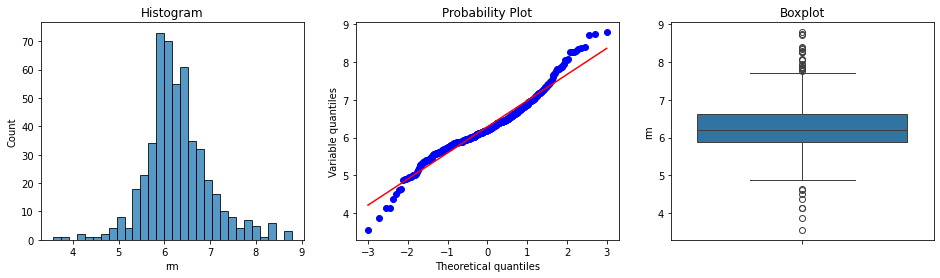

In [32]:
diagnostic_plots(data,'rm')

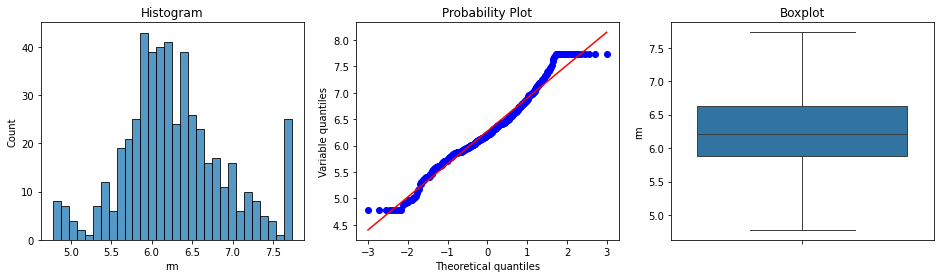

In [33]:
diagnostic_plots(data_t,'rm')

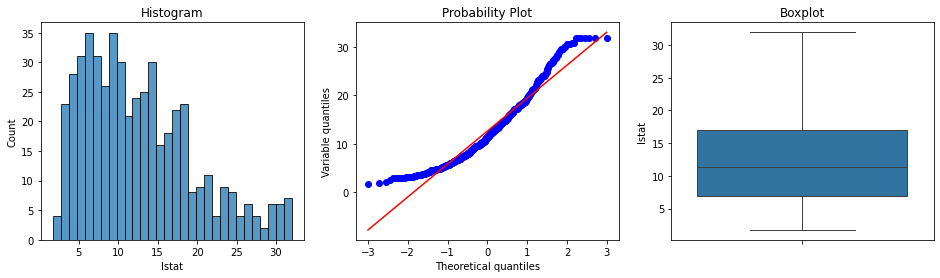

In [34]:
diagnostic_plots(data_t,'lstat')

In [35]:
# we can inspect the minimum caps for each variable
windsoriser.left_tail_caps_


{'rm': 4.778499999999999,
 'lstat': -8.057500000000005,
 'crim': -5.31051125,
 'medv': 5.0624999999999964}

In [36]:
# we can inspect the maximum caps for each variable
windsoriser.right_tail_caps_


{'rm': 7.730500000000001,
 'lstat': 31.962500000000006,
 'crim': 9.06963875,
 'medv': 36.962500000000006}